# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import confusion_matrix as cm

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
modelos=[LinReg(), Lasso(), Ridge(), ElasticNet(), SVR(), SGDR(), RFR(), KNNR(), GBR(), DTR()]

# Import data

In [3]:
data = pd.read_csv("../data/train.csv")

In [4]:
test = pd.read_csv("../data/test.csv")

In [5]:
sample = pd.read_csv("../data/sample.csv")

In [6]:
sample.shape

(1389, 2)

# Evaluation

In [7]:
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2842228,20211205213126,2021-12-06,Your little appartment on wheels,A waggon luxurous designed as a hotel room on ...,"Waterland is a beautiful countryside area, wit...",https://a0.muscache.com/pictures/cc2aa51a-3c11...,3040748,https://www.airbnb.com/users/show/3040748,...,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,https://www.airbnb.com/rooms/41236669,20211205213126,2021-12-06,Spacious 4p city center apartment (2 bedrooms!),Are you looking for a perfect place to stay in...,Our home is located in the Plantagebuurt. A un...,https://a0.muscache.com/pictures/5f33bf5a-399c...,34773624,https://www.airbnb.com/users/show/34773624,...,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40
2,2,https://www.airbnb.com/rooms/27240740,20211205213126,2021-12-06,SWEETS hotel Theophile de Bockbrug,Comfortable bridge house on the doorstep of Am...,"The neighbourhood has a quiet, village-like fe...",https://a0.muscache.com/pictures/b1145dd1-e485...,203731852,https://www.airbnb.com/users/show/203731852,...,4.87,4.87,4.40,Exempt,t,20,4,0,0,1.25


In [8]:
data.shape

(4167, 74)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4167 non-null   int64  
 1   listing_url                                   4167 non-null   object 
 2   scrape_id                                     4167 non-null   int64  
 3   last_scraped                                  4167 non-null   object 
 4   name                                          4167 non-null   object 
 5   description                                   4159 non-null   object 
 6   neighborhood_overview                         3004 non-null   object 
 7   picture_url                                   4167 non-null   object 
 8   host_id                                       4167 non-null   int64  
 9   host_url                                      4167 non-null   o

# Cleaning

In [10]:
#Tomo las columnas numéricas y elimino las que no son relevantes para mi y ("price")

df_numeric=data._get_numeric_data().drop(columns=['scrape_id', 'host_id', 'calendar_updated',
                                       'review_scores_rating', 'review_scores_cleanliness', 
                                       'review_scores_checkin', 'review_scores_location', 
                                       'review_scores_communication', 'review_scores_accuracy',
                                       'calculated_host_listings_count', 'bathrooms',
                                       'calculated_host_listings_count_entire_homes', 
                                       'calculated_host_listings_count_private_rooms', 
                                       'calculated_host_listings_count_shared_rooms',
                                       'reviews_per_month', 'neighbourhood_group_cleansed'])

In [11]:
test= test._get_numeric_data().drop(columns=['scrape_id', 'host_id', 'calendar_updated',
                                       'review_scores_rating', 'review_scores_cleanliness', 
                                       'review_scores_checkin', 'review_scores_location', 
                                       'review_scores_communication', 'review_scores_accuracy',
                                       'calculated_host_listings_count', 'bathrooms',
                                       'calculated_host_listings_count_entire_homes', 
                                       'calculated_host_listings_count_private_rooms', 
                                       'calculated_host_listings_count_shared_rooms',
                                       'reviews_per_month', 'neighbourhood_group_cleansed'])

In [12]:
df_numeric.head(2)

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_value
0,0,13,13,52.39508,4.99186,3,1.0,NaN,87.0,2,...,2.0,1125.0,0,0,0,249,81,0,0,4.49
1,1,0,0,52.36371,4.90745,4,2.0,2.0,250.0,2,...,2.0,1125.0,3,3,3,3,9,4,1,4.89


In [13]:
# Chequeo valores nulos para transformarlos.

null= df_numeric.isnull().sum()
print(null)

id                             0
host_listings_count            0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bedrooms                     253
beds                         174
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         1
maximum_minimum_nights         1
minimum_maximum_nights         1
maximum_maximum_nights         1
minimum_nights_avg_ntm         1
maximum_nights_avg_ntm         1
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_value          385
dtype: int64


In [14]:
df=df_numeric.copy()

In [15]:
data.review_scores_value.unique()

array([4.49, 4.89, 4.4 , 4.7 , 4.57, 4.44, 4.75, 4.22, 4.67, 4.58,  nan,
       4.83, 4.88, 4.51, 4.74, 4.56, 4.77, 3.67, 4.36, 4.27, 4.73, 5.  ,
       3.  , 4.63, 4.81, 4.55, 4.59, 4.79, 4.33, 4.31, 4.6 , 4.76, 4.54,
       4.78, 4.18, 4.38, 4.5 , 4.43, 4.71, 4.69, 4.72, 4.65, 4.64, 4.21,
       4.32, 4.3 , 4.53, 4.68, 4.8 , 4.  , 4.62, 4.85, 4.61, 4.09, 4.04,
       4.92, 4.86, 4.25, 4.39, 4.52, 4.91, 4.13, 4.16, 4.15, 4.93, 4.48,
       4.94, 4.66, 3.83, 3.73, 4.2 , 4.45, 1.  , 4.26, 4.84, 3.33, 4.9 ,
       4.47, 4.34, 4.37, 4.19, 4.95, 4.07, 4.06, 4.87, 4.82, 3.76, 4.29,
       4.41, 4.42, 3.25, 3.8 , 3.75, 4.28, 4.46, 3.5 , 4.35, 3.86, 3.65,
       3.6 , 4.17, 4.05, 4.11, 4.1 , 4.12, 4.14, 4.24, 3.57, 3.71, 3.94,
       4.01, 4.96, 3.38, 3.79, 4.23, 4.08, 3.64, 2.  , 3.96, 4.97, 2.8 ,
       3.89])

In [16]:
# Relleno Nan de review_scores_value con la media.

df['review_scores_value'].fillna(float(df['review_scores_value'].mean()), inplace=True)

In [17]:
test['review_scores_value'].fillna(float(test['review_scores_value'].mean()), inplace=True)

In [18]:
df.bedrooms.unique()

array([ 1.,  2.,  3.,  5., nan,  4.,  7.,  8., 10.,  6.])

In [19]:
# Relleno Nan de habitaciones con la mediana.

df['bedrooms'].fillna(int(df['bedrooms'].median()), inplace=True)

In [20]:
test['bedrooms'].fillna(int(test['bedrooms'].median()), inplace=True)

In [21]:
df.beds.unique()

array([nan,  2.,  1.,  4.,  5.,  3., 14.,  6.,  8., 18., 12.,  7., 17.,
       13., 11., 24., 20., 10., 16., 33.])

In [22]:
# Relleno Nan de camas con el número mínimo de camas.

df['beds'].fillna(1, inplace=True)

In [23]:
test['beds'].fillna(1, inplace=True)

In [24]:
"""
Para las siguientes columnas los nan los relleno con 0;
minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'
"""

df.fillna(0, inplace=True)

In [25]:
test.fillna(0, inplace=True)

In [26]:
# Con esto ya me he quitado tdos los Nan.

null= df.isnull().sum()
print(null)

id                           0
host_listings_count          0
host_total_listings_count    0
latitude                     0
longitude                    0
accommodates                 0
bedrooms                     0
beds                         0
price                        0
minimum_nights               0
maximum_nights               0
minimum_minimum_nights       0
maximum_minimum_nights       0
minimum_maximum_nights       0
maximum_maximum_nights       0
minimum_nights_avg_ntm       0
maximum_nights_avg_ntm       0
availability_30              0
availability_60              0
availability_90              0
availability_365             0
number_of_reviews            0
number_of_reviews_ltm        0
number_of_reviews_l30d       0
review_scores_value          0
dtype: int64


In [27]:
# Saco el número de baños en de la columna "bathrooms_text" e incluyo mi columna en mi df.

data.bathrooms_text.unique()

array(['1.5 shared baths', '1 bath', '1 private bath', '1.5 baths',
       '2.5 baths', '1 shared bath', '2 baths', '3.5 shared baths',
       '3 baths', 'Half-bath', 'Shared half-bath', '0 baths', nan,
       '4 shared baths', '3.5 baths', '5 baths', '3 shared baths',
       '0 shared baths', '2 shared baths', 'Private half-bath',
       '4.5 baths', '5.5 baths', '4 baths'], dtype=object)

In [28]:
# Función sobre la que posteriormente aplico en las columnas de train y test.
import re

patron='[0-9]+'

def limpieza_ba(x):
    n_ba=0
    
    try:
        n_ba=int(re.findall(patron, x)[0])
    except:
        n_ba=0
        
    return n_ba

data.bathrooms_text.apply(limpieza_ba)[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: bathrooms_text, dtype: int64

In [29]:
df['bathroom']=data.bathrooms_text.apply(limpieza_ba)

In [30]:
test['bathroom']=data.bathrooms_text.apply(limpieza_ba)

In [31]:
df.bathroom.unique()

array([1, 2, 3, 0, 4, 5])

In [32]:
data.room_type.unique() 

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [33]:
# Tranformo la columna "room_type" en números enteros de la forma que indico abajo.

dict = {'Private room' : 2, 'Entire home/apt' : 4, "Shared room": 1, "Hotel room": 3}
data=data.replace({"room_type": dict})

In [34]:
df['room_type'] = data.room_type

In [35]:
df.shape

(4167, 27)

In [36]:
test['room_type'] = data.room_type

In [37]:
from sklearn import preprocessing

In [38]:
le = preprocessing.LabelEncoder()

In [39]:
le.fit([True, False])

LabelEncoder()

In [40]:
data['host_is_superhost'] = le.fit_transform(data.host_is_superhost.values)

In [41]:
df['host_is_superhost'] = data.host_is_superhost

In [42]:
test['host_is_superhost'] = data.host_is_superhost

In [43]:
data.property_type.unique()

array(['Private room in farm stay', 'Entire rental unit',
       'Room in serviced apartment', 'Private room in rental unit',
       'Private room in loft', 'Entire residential home',
       'Room in boutique hotel', 'Entire condominium (condo)',
       'Private room in houseboat', 'Private room in condominium (condo)',
       'Entire cottage', 'Private room in bed and breakfast',
       'Private room in boat', 'Boat', 'Entire loft', 'Houseboat',
       'Tower', 'Entire townhouse', 'Private room in residential home',
       'Private room in guest suite', 'Entire serviced apartment',
       'Room in hotel', 'Room in hostel', 'Private room in townhouse',
       'Entire villa', 'Private room in guesthouse',
       'Shared room in boat', 'Room in bed and breakfast',
       'Entire chalet', 'Entire guest suite', 'Room in aparthotel',
       'Private room in hostel', 'Entire vacation home',
       'Private room in serviced apartment', 'Entire place',
       'Shared room in hostel', 'Shared r

In [44]:
# Aquí voy concatenar los csv de train y test para hacer el get dummies de la columna "property_type".

In [45]:
df = df.drop(columns=['price'])

In [46]:
total=pd.concat([df, test], axis=0)

In [47]:
total['property_type'] = data.property_type

In [48]:
total.shape

(5556, 28)

In [49]:
total=pd.concat([total, pd.get_dummies(total.property_type)], axis=1)

In [50]:
total.shape

(5556, 81)

In [51]:
# A continuación separo la parte de "train" y "test".

In [52]:
train = total.iloc[0:4167]

In [53]:
train = train.drop(columns=['property_type'])

In [54]:
train['price'] = data.price

In [55]:
train.shape

(4167, 81)

In [56]:
test = total.iloc[4167:5556]

In [57]:
test = test.drop(columns=['property_type'])

In [58]:
test.shape

(1389, 80)

In [59]:
test.head(2)

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,Room in hotel,Room in serviced apartment,Shared room in bed and breakfast,Shared room in boat,Shared room in hostel,Shared room in houseboat,Shared room in rental unit,Shared room in residential home,Tiny house,Tower
0,0,1,1,52.35713,4.92470,1,1.0,1.0,2,1125,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,52.38810,4.91438,2,1.0,1.0,1,365,...,0,0,0,0,0,0,0,0,0,0


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 1388
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1389 non-null   int64  
 1   host_listings_count                  1389 non-null   int64  
 2   host_total_listings_count            1389 non-null   int64  
 3   latitude                             1389 non-null   float64
 4   longitude                            1389 non-null   float64
 5   accommodates                         1389 non-null   int64  
 6   bedrooms                             1389 non-null   float64
 7   beds                                 1389 non-null   float64
 8   minimum_nights                       1389 non-null   int64  
 9   maximum_nights                       1389 non-null   int64  
 10  minimum_minimum_nights               1389 non-null   float64
 11  maximum_minimum_nights        

In [61]:
test.shape

(1389, 80)

In [62]:
train.shape

(4167, 81)

I drop here columns that are not relevant to me (shown in below fig; "importance of features").

In [63]:
train.columns

Index(['id', 'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_value', 'bathroom', 'room_type', 'host_is_superhost',
       'Barn', 'Boat', 'Camper/RV', 'Casa particular', 'Cave', 'Entire cabin',
       'Entire chalet', 'Entire condominium (condo)', 'Entire cottage',
       'Entire guest suite', 'Entire guesthouse', 'Entire home/apt',
       'Entire loft', 'Entire place', 'Entire rental unit',
       'Entire residential home', 'Entire serviced apartment',
       'Entire townhouse', 'Entire vacation home', 'Entire villa', 'Hous

In [64]:
# Elimino columnas que no son relevantes al precio.
train = train.drop(columns=['Barn', 'Boat', 'Camper/RV', 'Casa particular', 'Cave', 'Entire cabin', 'Entire chalet',
       'Entire condominium (condo)', 'Entire cottage', 'Entire guest suite',
       'Entire guesthouse', 'Entire home/apt', 'Entire loft', 'Entire place', 'Entire rental unit', 'Entire residential home',
       'Entire serviced apartment', 'Entire townhouse', 'Entire vacation home',
       'Entire villa', 'Private room',
       'Private room in bed and breakfast', 'Private room in boat',
       'Private room in cabin', 'Private room in casa particular',
       'Private room in condominium (condo)', 'Private room in farm stay',
       'Private room in guest suite', 'Private room in guesthouse',
       'Private room in hostel', 'Private room in houseboat',
       'Private room in loft', 'Private room in rental unit',
       'Private room in residential home',
       'Private room in serviced apartment', 'Private room in tiny house',
       'Private room in townhouse', 'Private room in villa',
       'Room in aparthotel', 'Room in bed and breakfast', 'Room in hostel', 'Room in serviced apartment', 'Shared room in bed and breakfast',
       'Shared room in boat', 'Shared room in hostel',
       'Shared room in houseboat', 'Shared room in rental unit',
       'Shared room in residential home', 'Tiny house',])

In [65]:
test = test.drop(columns=['Barn', 'Boat', 'Camper/RV', 'Casa particular', 'Cave', 'Entire cabin', 'Entire chalet',
       'Entire condominium (condo)', 'Entire cottage', 'Entire guest suite',
       'Entire guesthouse', 'Entire home/apt', 'Entire loft', 'Entire place', 'Entire rental unit', 'Entire residential home',
       'Entire serviced apartment', 'Entire townhouse', 'Entire vacation home',
       'Entire villa', 'Private room',
       'Private room in bed and breakfast', 'Private room in boat',
       'Private room in cabin', 'Private room in casa particular',
       'Private room in condominium (condo)', 'Private room in farm stay',
       'Private room in guest suite', 'Private room in guesthouse',
       'Private room in hostel', 'Private room in houseboat',
       'Private room in loft', 'Private room in rental unit',
       'Private room in residential home',
       'Private room in serviced apartment', 'Private room in tiny house',
       'Private room in townhouse', 'Private room in villa',
       'Room in aparthotel', 'Room in bed and breakfast', 'Room in hostel', 'Room in serviced apartment', 'Shared room in bed and breakfast',
       'Shared room in boat', 'Shared room in hostel',
       'Shared room in houseboat', 'Shared room in rental unit',
       'Shared room in residential home', 'Tiny house',])

## Comprobación matriz correlación

<AxesSubplot:>

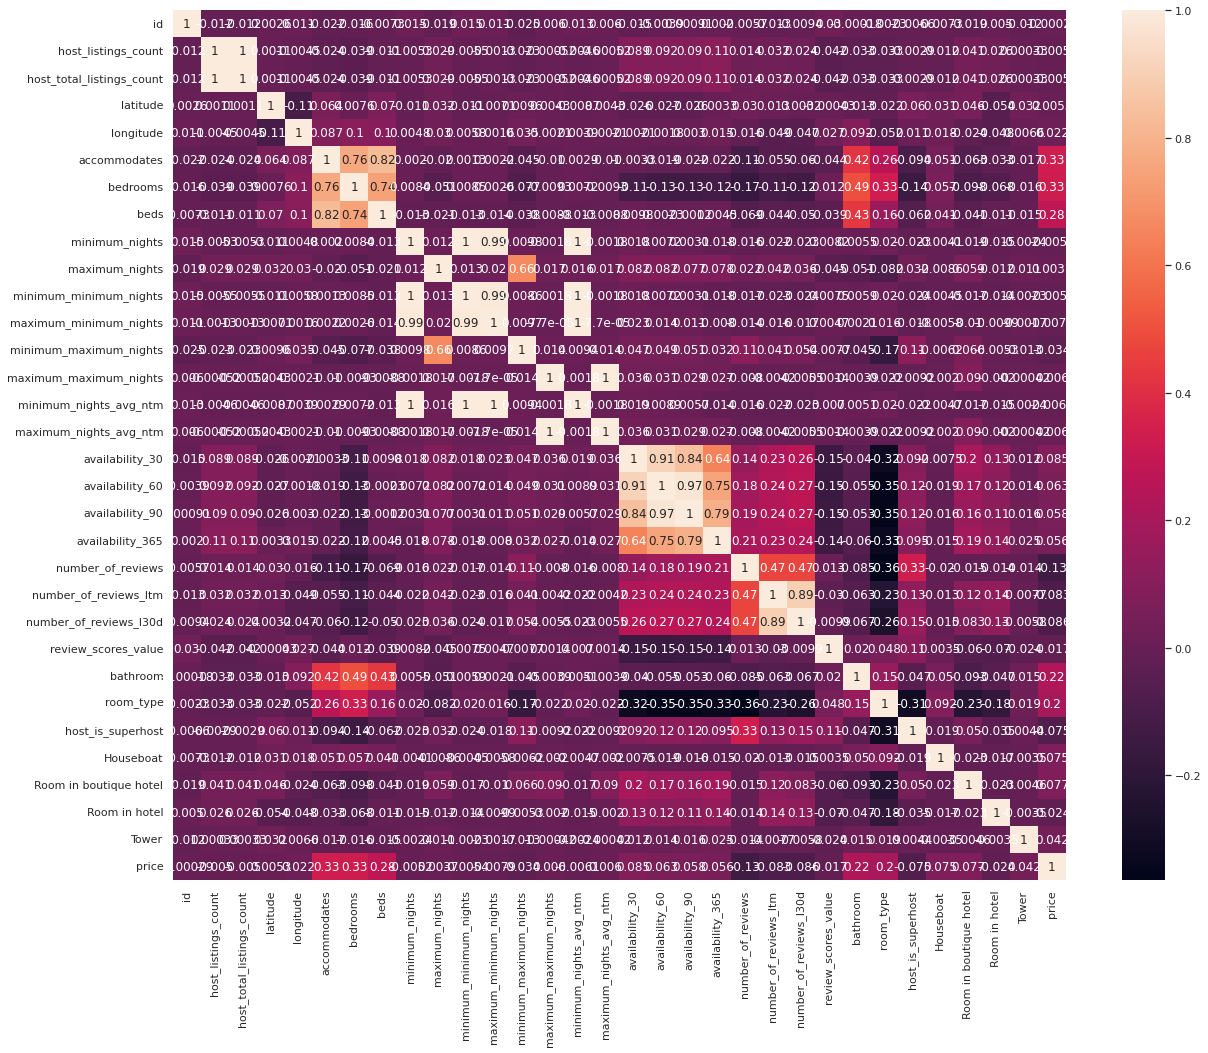

In [66]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (20.,16.)})
sns.set_style("whitegrid")
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)

In [67]:
# Aquí elimino las columnas con una correlación mayor de 0,80 así como columnas que considero no aportan valor. Tomadas 
# de la gráfica "feature_importances_".

train=train.drop(columns=['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights',
                                       'minimum_maximum_nights', 'maximum_maximum_nights', 
                                       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
                                       'number_of_reviews_ltm', 'availability_90', 'availability_365', 'availability_60',
                                       'number_of_reviews_l30d', 'maximum_nights', 'bathroom', 'beds'])

In [68]:
test=test.drop(columns=['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights',
                                       'minimum_maximum_nights', 'maximum_maximum_nights', 
                                       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
                                       'number_of_reviews_ltm', 'availability_90', 'availability_365', 'availability_60',
                                       'number_of_reviews_l30d', 'maximum_nights', 'bathroom', 'beds'])

<AxesSubplot:>

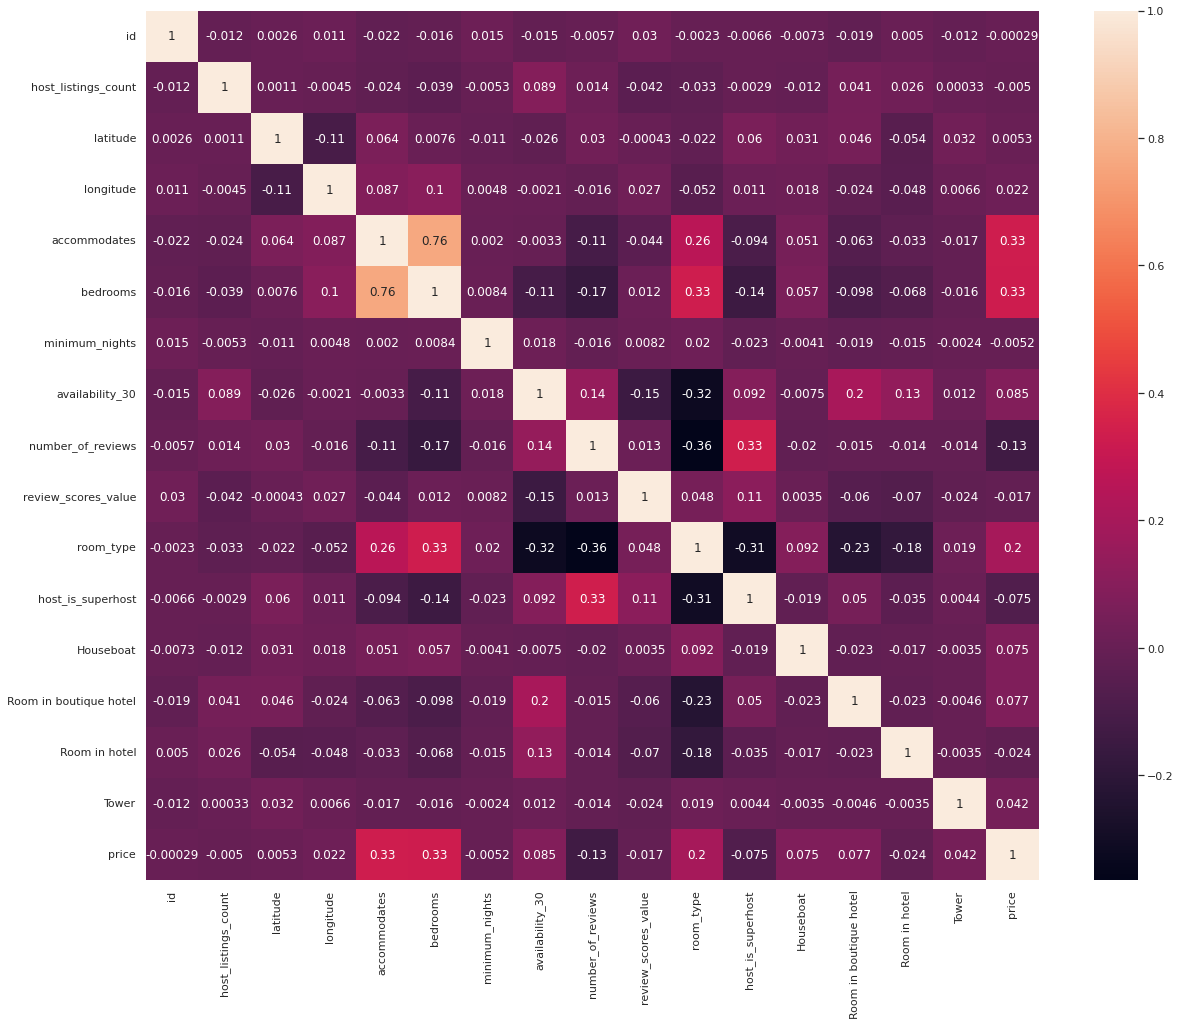

In [69]:
# Matriz de correlación.
sns.set_context("poster")
sns.set(rc={"figure.figsize": (20.,16.)})
sns.set_style("whitegrid")
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)

In [70]:
train.shape

(4167, 17)

In [101]:
train.to_csv('train.csv', index=False, header=True)

In [71]:
test.shape

(1389, 16)

In [102]:
test.to_csv('test.csv', index=False, header=True)

In [72]:
sample.shape

(1389, 2)

# Train, test, split

In [73]:
from sklearn.model_selection import train_test_split as tts

In [74]:
train.shape

(4167, 17)

In [75]:
test.shape

(1389, 16)

In [76]:
X=train.drop('price', axis=1)
y=train.price

In [77]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.05, random_state=1)

In [78]:
# modelo

from sklearn.ensemble import RandomForestRegressor as RFR

In [79]:
modelo=RFR(n_estimators=400)

modelo.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400)

In [80]:
modelo.feature_importances_

array([0.08172163, 0.07153757, 0.07850014, 0.24577605, 0.07636758,
       0.08694368, 0.02035505, 0.06136057, 0.09346713, 0.03047141,
       0.02153132, 0.02844734, 0.0082616 , 0.08507153, 0.00650021,
       0.0036872 ])

<BarContainer object of 16 artists>

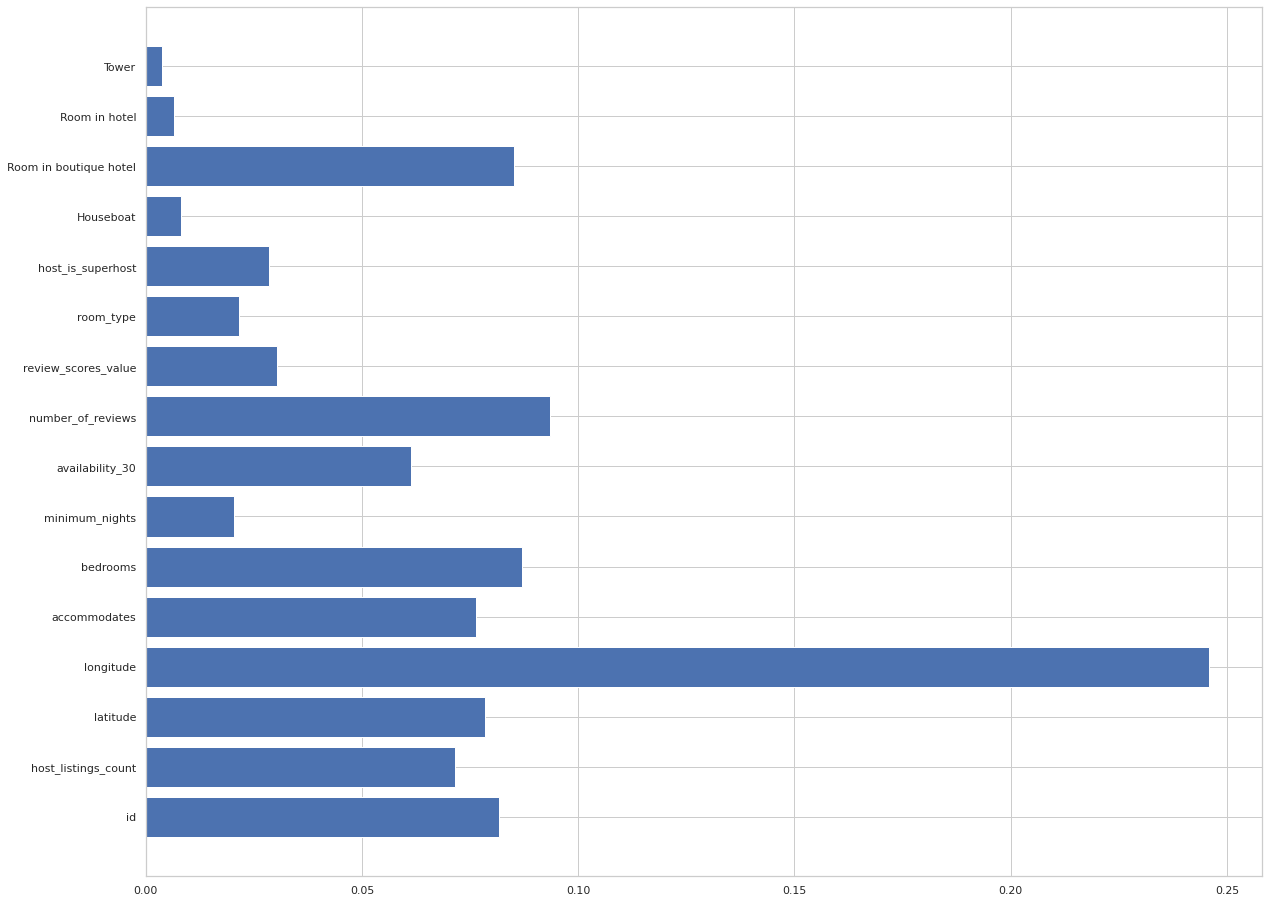

In [81]:
# Matriz de importancia de las columnas con respecto el precio.

plt.barh(X.columns, modelo.feature_importances_)

In [82]:
#help(modelo)

In [83]:
modelo.score(X_test, y_test)# R2

0.04881392251082617

In [84]:
y_pred=modelo.predict(X_test)

In [85]:
train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)


print('Train:', train_score)
print('Test:', test_score) 

Train: 0.9099286851906724
Test: 0.04881392251082617


In [86]:
# Meto esta función para determinar qué
def bosque(n):
    rfr=RFR(n_estimators=n)
    rfr.fit(X_train, y_train)

    y_pred=rfr.predict(X_test)

    train_score=rfr.score(X_train, y_train)  
    test_score=rfr.score(X_test, y_test)


    print('Train:', train_score)
    print('Test:', test_score) 

In [87]:
for e in [200, 300, 400, 500, 600]:
    print(e, bosque(e))

Train: 0.9205668612922528
Test: 0.15058705643242765
200 None
Train: 0.89778682056081
Test: 0.12332447044968986
300 None
Train: 0.918083692083071
Test: 0.10959873516307761
400 None
Train: 0.9064414258260904
Test: 0.12120723350677731
500 None
Train: 0.91665074222109
Test: 0.2685913369496482
600 None


In [88]:
from sklearn.metrics import mean_squared_error as mse

In [89]:
mse(y_pred, y_test, squared=False) # rmse

95.91280883455916

In [90]:
y_pred=modelo.predict(test)

In [91]:
y_pred.shape

(1389,)

In [92]:
submission_df=pd.DataFrame()


submission_df['id']=test['id']
submission_df['price']=y_pred

submission_df.shape

(1389, 2)

In [93]:
submission_df.head()

,id,price
0,0,113.8875
1,1,135.5475
2,2,147.1425
3,3,155.9950
4,4,184.9525


In [94]:
submission_df.to_csv('prediccion.csv', index=False, header=True)

In [95]:
# Aquí lo que hago es mirar diferentes modelos y ver cual tiene mejor performance.
dict_fit ={}

In [96]:
modelos=[LinReg(), Lasso(), Ridge(), ElasticNet(), SVR(), SGDR(), RFR(), KNNR(), GBR(), DTR()]

In [97]:
def regre(modelo):
    
    modelo.fit(X_train, y_train)
    
    train_score=modelo.score(X_train, y_train)  # R2
    test_score=modelo.score(X_test, y_test)
    
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    
    return modelo

In [98]:
for i, e in enumerate(modelos):
    dict_fit[regre(e)] = (train_score, test_score)

LinearRegression()
Train R2: 0.16501354833982218
Test R2: 0.45636470749386526
Lasso()
Train R2: 0.15989801194198006
Test R2: 0.4603201623965941
Ridge()
Train R2: 0.16488986380212556
Test R2: 0.45597107982275087
ElasticNet()
Train R2: 0.14493372368150348
Test R2: 0.4305683780928873
SVR()
Train R2: -0.028478992429588734
Test R2: -0.04805805845693567
SGDRegressor()
Train R2: -7.118996693046078e+25
Test R2: -2.2773130484554114e+26
RandomForestRegressor()
Train R2: 0.9048327748643185
Test R2: -0.45559643625258706
KNeighborsRegressor()
Train R2: 0.25732248023451254
Test R2: -0.15067336084781568
GradientBoostingRegressor()
Train R2: 0.6529670032986807
Test R2: 0.4674715334320647
DecisionTreeRegressor()
Train R2: 1.0
Test R2: -0.14353818434980892
